In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Загрузка данных

## Идентификаторы пользователей

Таблица с уникальными идентификаторами пользователей (olist_customers_dataset.csv):
* customer_id — позаказный идентификатор пользователя;
* customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта);
* customer_zip_code_prefix — почтовый индекс пользователя;
* customer_city — город доставки пользователя;
* customer_state — штат доставки пользователя.

In [2]:
dfc = pd.read_csv('olist_customers_dataset.csv')

In [3]:
dfc.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Пропущенных значений нет. Типы определены за исключением индекса. По формату это число, но по смыслу - категориальная переменная. Преобразуем к строковому типу.



In [5]:
dfc['customer_zip_code_prefix'] = dfc['customer_zip_code_prefix'].apply(str)

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [7]:
dfc.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Заказы

Таблица заказов (olist_orders_dataset.csv):
* order_id — уникальный идентификатор заказа (номер чека);
* customer_id — позаказный идентификатор пользователя;
* order_status — статус заказа;
* order_purchase_timestamp — время создания заказа;
* order_approved_at — время подтверждения оплаты заказа;
* order_delivered_carrier_date — время передачи заказа в логистическую службу;
* order_delivered_customer_date — время доставки заказа;
* order_estimated_delivery_date — обещанная дата доставки.

In [8]:
dfo = pd.read_csv('olist_orders_dataset.csv')

In [9]:
dfo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Пропущенных значений нет.

Преобразуем поля с датами из строкового в тип дата-время.

In [11]:
dfo['order_purchase_timestamp'] = pd.to_datetime(dfo['order_purchase_timestamp'])
dfo['order_approved_at'] = pd.to_datetime(dfo['order_approved_at'])
dfo['order_delivered_carrier_date'] = pd.to_datetime(dfo['order_delivered_carrier_date'])
dfo['order_delivered_customer_date'] = pd.to_datetime(dfo['order_delivered_customer_date'])
dfo['order_estimated_delivery_date'] = pd.to_datetime(dfo['order_estimated_delivery_date'])

In [12]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Товарные позиции

Товарные позиции, входящие в заказы (list_order_items_dataset.csv):
* order_id — уникальный идентификатор заказа (номер чека);
* order_item_id — идентификатор товара внутри одного заказа;
* product_id — ид товара (аналог штрихкода);
* seller_id — ид производителя товара;
* shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнёру по логистике;
* price — цена за единицу товара;
* freight_value — вес товара.

In [13]:
dfi = pd.read_csv('olist_order_items_dataset.csv')

In [14]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
dfi.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
dfi['shipping_limit_date'] = pd.to_datetime(dfi['shipping_limit_date'])

In [17]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Схема данных

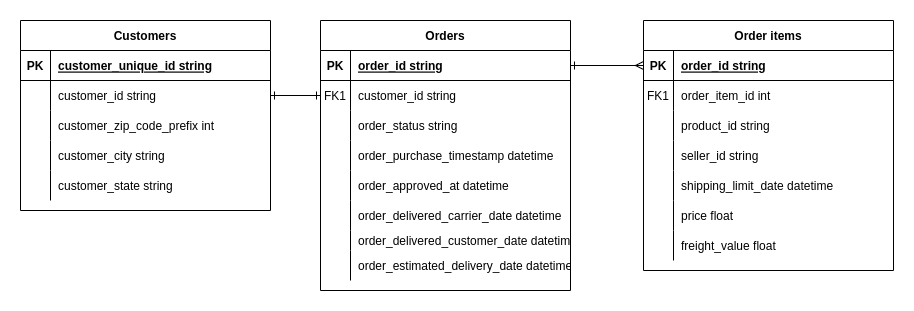

# Разведочный анализ

Сперва рассмотрим таблицы по-отдельности.

## Клиенты

In [18]:
dfc.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
dfc.describe()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [20]:
dfc.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

### Идентификатор пользователя

Идентификатор пользователя (первое поле) уникальный, как ему и полагается. А вот customer_unique_id повторяется, что вполне логично, т.к. один пользователь может совершить несколько заказов. При этом каждый заказ будет иметь свой уникальный идентификатор клиента (customer_id).

In [21]:
dfc.groupby('customer_unique_id', as_index=False) \
  .agg(count=('customer_unique_id', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,customer_unique_id,count
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
96091,5657dfebff5868c4dc7e8355fea865c4,1
96092,5657596addb4d7b07b32cd330614bdf8,1
96093,5656eb169546146caeab56c3ffc3d268,1
96094,5656a8fabc8629ff96b2bc14f8c09a27,1


In [22]:
dfc.groupby('customer_unique_id', as_index=False) \
  .agg(customer_unique_id_count=('customer_unique_id', 'count')) \
  .sort_values('customer_unique_id_count', ascending=False) \
  .value_counts('customer_unique_id_count')

customer_unique_id_count
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
dtype: int64

Подавляющее клиентов сделало по одному заказу. Несколько и более совершили единицы. Наиболее "плодовитый" клиент совершил 17 заказов. Визуализируем распределение.

In [23]:
customer_orders_count = dfc.groupby('customer_unique_id', as_index=False) \
  .agg(count=('customer_unique_id', 'count')) \
  .sort_values('count', ascending=False) \
  .values

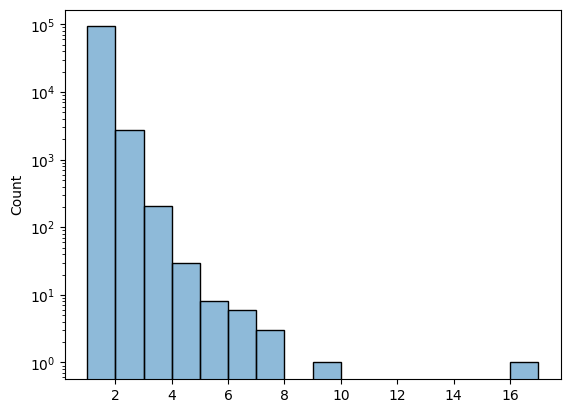

In [24]:
sns.histplot(customer_orders_count, binwidth=1, legend=False)
plt.yscale('log')

### Индекс

Проанализируем также индекс.

In [25]:
dfc.groupby('customer_zip_code_prefix', as_index=False) \
  .agg(count=('customer_zip_code_prefix', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,customer_zip_code_prefix,count
0,22790,142
1,24220,124
2,22793,121
3,24230,117
4,22775,110
...,...,...
14989,61919,1
14990,61903,1
14991,61902,1
14992,61801,1


In [26]:
dfc.groupby('customer_zip_code_prefix', as_index=False) \
  .agg(zip_code_count=('customer_zip_code_prefix', 'count')) \
  .sort_values('zip_code_count', ascending=False) \
  .value_counts('zip_code_count')

zip_code_count
1      3012
2      2143
3      1736
4      1348
5      1084
       ... 
75        1
59        1
61        1
66        1
142       1
Length: 90, dtype: int64

In [27]:
customer_index_count = dfc.groupby('customer_zip_code_prefix', as_index=False) \
  .agg(zip_code_count=('customer_zip_code_prefix', 'count')) \
  .sort_values('zip_code_count', ascending=False) \
  .values

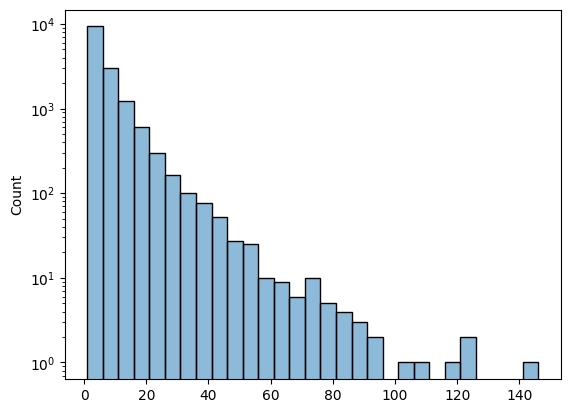

In [28]:
sns.histplot(customer_index_count, binwidth=5, legend=False)
plt.yscale('log')

Здесь уже не такая однозначная картина: есть довольно большое количество "популярных" индексов, т.е. доля покупательей с каким-то одним индексом прилична.

### Города

In [29]:
dfc.groupby('customer_city', as_index=False) \
  .agg(count=('customer_city', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


In [30]:
dfc.groupby('customer_city') \
  .agg(city_count=('customer_city', 'count')) \
  .sort_values('city_count', ascending=False) \
  .value_counts()

city_count
1             1144
2              658
3              425
4              272
5              205
              ... 
169              1
159              1
157              1
155              1
15540            1
Length: 210, dtype: int64

In [31]:
dfc.groupby('customer_city') \
  .agg(city_count=('customer_city', 'count')) \
  .sort_values('city_count', ascending=False) \
  .value_counts()

city_count
1             1144
2              658
3              425
4              272
5              205
              ... 
169              1
159              1
157              1
155              1
15540            1
Length: 210, dtype: int64

In [32]:
dfc.groupby('customer_city') \
  .agg(city_count=('customer_city', 'count')) \
  .sort_values('city_count', ascending=False) \
  .describe()

,city_count
count,4119.000000
mean,24.142025
std,279.272382
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,15540.000000


Разброс в данных очень большой, есть несколько городов, в которых было сделано много заказов. Похоже, что это крупные города: Сан-Паулу, Рио-де-Жанейро, Бразилиа и т.д. Визуализировать такое распределение довольно трудно, даже с использованием логарифмирования.

In [33]:
customer_cities_count = dfc.groupby('customer_city') \
  .agg(city_count=('customer_city', 'count')) \
  .sort_values('city_count', ascending=False) \
  .values

<Axes: >

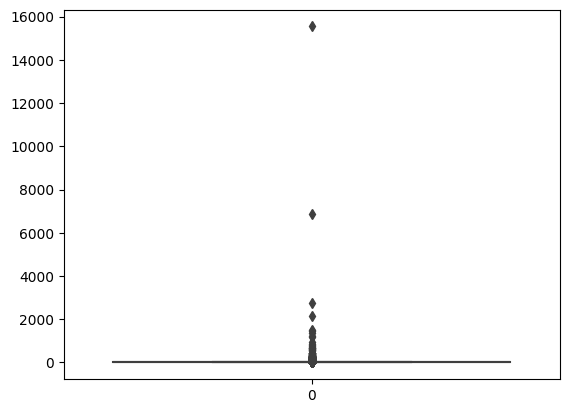

In [34]:
sns.boxplot(customer_cities_count)

<Axes: >

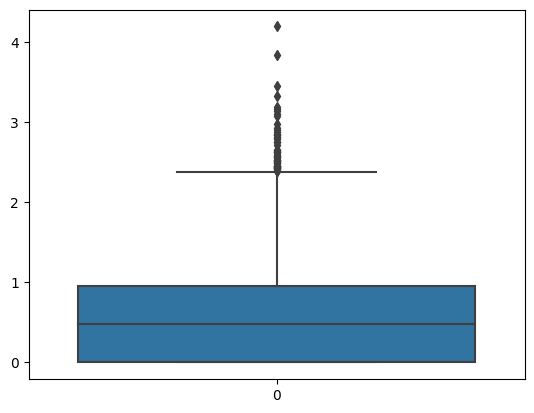

In [35]:
sns.boxplot(np.log10(customer_cities_count))

<Axes: ylabel='Count'>

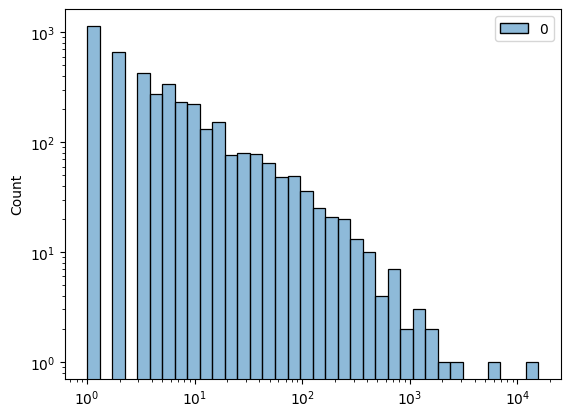

In [36]:
sns.histplot(customer_cities_count, log_scale=(10, 10))

In [37]:
dfc.groupby('customer_city', as_index=False) \
  .agg(count=('customer_city', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True) \
  .head(10)

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [38]:
top10_cities_cnt = dfc.groupby('customer_city', as_index=False) \
  .agg(cnt=('customer_city', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True) \
  .head(10) \
  .cnt.sum()
top10_cities_cnt

35042

In [39]:
round(top10_cities_cnt / dfc.shape[0] * 100, 2)

35.24

Топ-10 городов дают 35% заказов.

### Штаты

In [40]:
dfc.groupby('customer_state', as_index=False) \
  .agg(count=('customer_state', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


<Axes: xlabel='customer_state', ylabel='Count'>

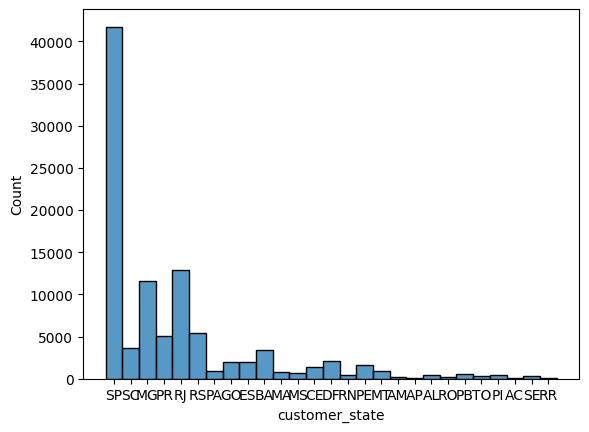

In [41]:
sns.histplot(dfc.customer_state)

В случае со штатами географическая неравномерность выражена ещё ярче: топ-3 штата (Сан-Паулу, Рио-де-Жанейро и Минас-Жерайс) дают больше половины заказов.

## Заказы

In [42]:
dfo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [43]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [44]:
dfo.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Обращает внимание тот факт, что количество отметок времени о подтверждении заказа, передачи в доставку и самой доставки меньше, чем общее количество заказов. Следовательно можно сделать вывод о том, что не все заказы были подтверждены и доставлены.
Посмотрим на статусы заказа.

In [45]:
dfo.groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Возможные статусы заказов:
* created — создан;
* approved — подтверждён;
* invoiced — выставлен счёт;
* processing — в процессе сборки заказа;
* shipped — отгружен со склада;
* delivered — доставлен пользователю;
* unavailable — недоступен;
* canceled — отменён.

Видно, что заказ может находиться во множестве различных стадий. Также, вероятно, может возникнуть ситуация, когда заказ оплачен, но до пользователя не доехал, т.к. был потерян службой доставки. Можно предположить, что такие заказы могут негативно влиять на лояльность пользователей и при её расчёте их лучше не учитывать, а обрабатывать отдельно.

Представляется логичным считать покупкой заказ, который был подтверждён пользователем и оплачен. Посмотрим, какие статусы присутствуют у рядов с отсутствующей датой оплаты.

In [46]:
dfo.query('order_approved_at != order_approved_at') \
  .groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,canceled,141
1,delivered,14
2,created,5


14 заказов было доставлено, но при этом у них отсутствует подтверждение оплаты.

In [47]:
dfo.query('order_approved_at != order_approved_at and order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Можно предположить, что это ошибка в БД, либо предполагалась оплата при получении (но тогда логично было бы всё же внести дату получения оплаты).

In [48]:
dfo.query('order_approved_at == order_approved_at') \
  .groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,delivered,96464
1,shipped,1107
2,unavailable,609
3,canceled,484
4,invoiced,314
5,processing,301
6,approved,2


Для ненулевой даты оплаты видим, что есть заказы со статусом "отменён", этот же статус встречается и в рядах с нулевой датой. Очевидно, что заказ может быть отменён на разных стадиях: до оплаты, либо после (с возможным возвратом средств). То же касается и статуса "недоступен".

Таким образом видим, что одной даты подтверждения оплаты для недостаточно, также как и статуса заказа. Необходимо использовать их комбинацию. Покупкой будем считать заказ с ненулевой датой подтверждения оплаты, а также статусом равным одному из значений "invoiced", "processing", "shipped", "delivered".

Сохраним заказы, которые попадают под наше определение покупки в отдельный датафрейм.

In [49]:
dfop = dfo.query('order_approved_at == order_approved_at') \
    .query('order_status in ("invoiced", "processing", "shipped", "delivered")')

In [50]:
dfop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98186 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98186 non-null  object        
 1   customer_id                    98186 non-null  object        
 2   order_status                   98186 non-null  object        
 3   order_purchase_timestamp       98186 non-null  datetime64[ns]
 4   order_approved_at              98186 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97569 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98186 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


In [51]:
dfop.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Товары

In [52]:
dfi.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [53]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [54]:
dfi.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [55]:
dfi.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [56]:
dfi.groupby('order_item_id', as_index=False) \
  .agg(count=('order_item_id', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,order_item_id,count
0,1,98666
1,2,9803
2,3,2287
3,4,965
4,5,460
5,6,256
6,7,58
7,8,36
8,9,28
9,10,25


<Axes: xlabel='order_item_id', ylabel='Count'>

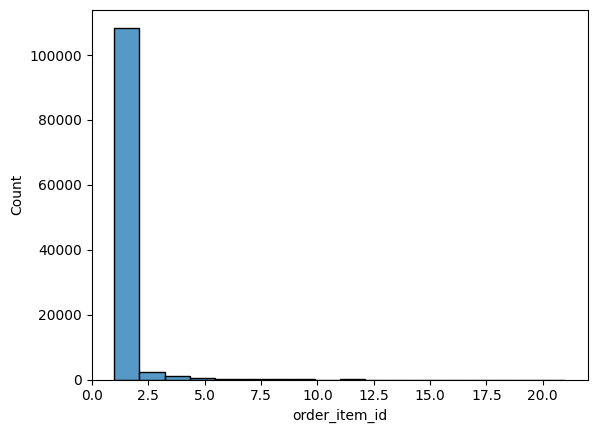

In [57]:
sns.histplot(dfi.order_item_id)

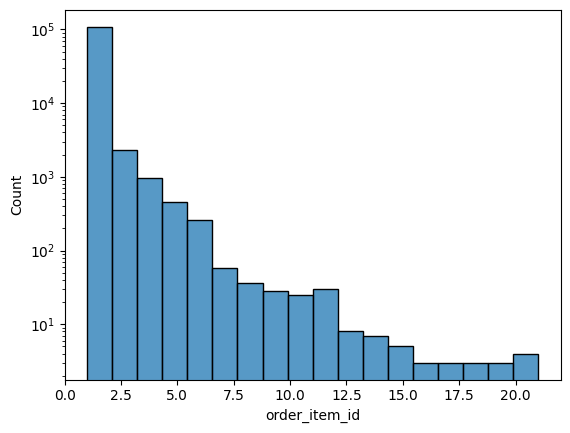

In [58]:
sns.histplot(dfi.order_item_id)
plt.yscale('log')

<Axes: xlabel='price', ylabel='Count'>

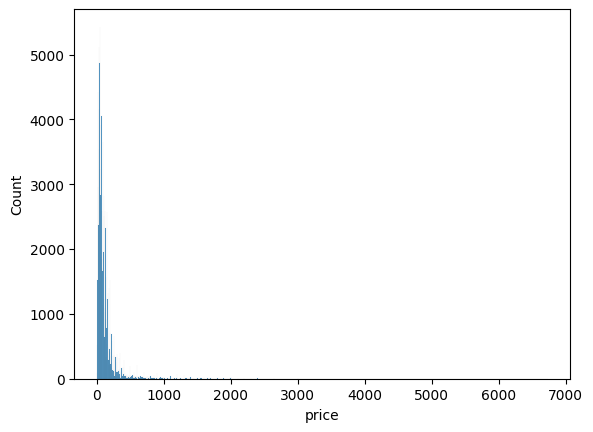

In [59]:
sns.histplot(dfi.price)

<Axes: xlabel='price', ylabel='Count'>

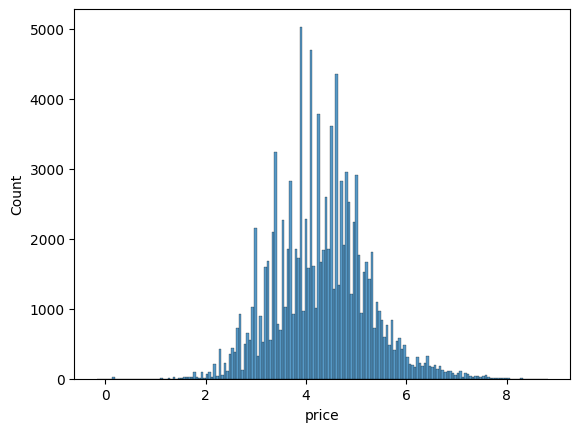

In [60]:
sns.histplot(np.log(dfi.price))

<Axes: xlabel='price', ylabel='Count'>

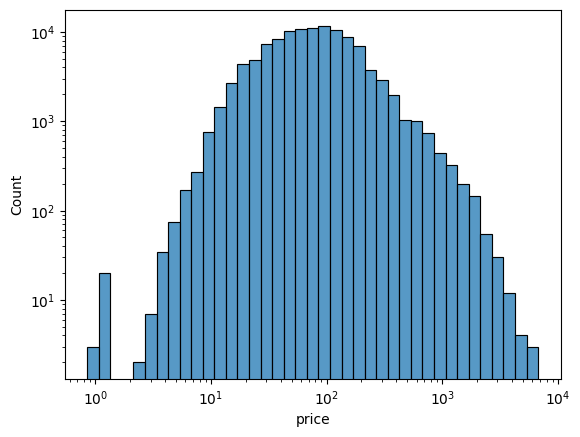

In [61]:
sns.histplot(dfi.price, log_scale=(10, 10), binwidth=0.1)

<Axes: xlabel='freight_value', ylabel='Count'>

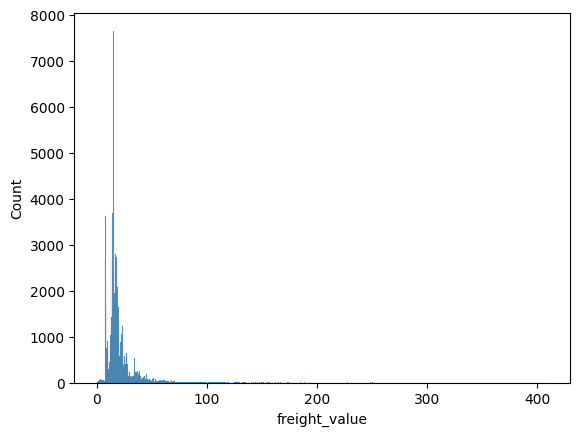

In [62]:
sns.histplot(dfi.freight_value)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='freight_value', ylabel='Count'>

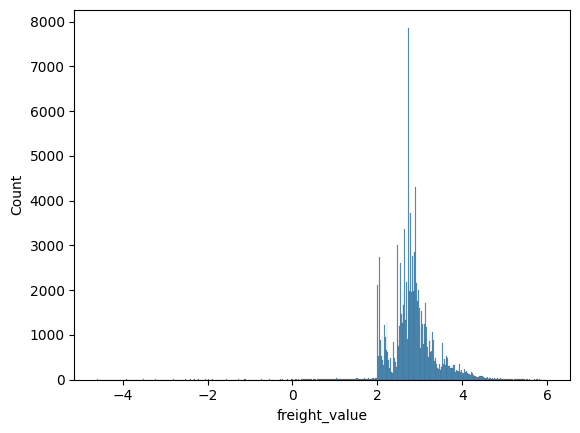

In [63]:
sns.histplot(np.log(dfi.freight_value))

In [64]:
# Этот код не выполнится, т.к. в датафрейме есть нулевые значения.
# sns.histplot(dfi.freight_value, log_scale=(10, 10))

In [65]:
dfi.query('freight_value == 0').shape

(383, 7)

<Axes: xlabel='freight_value', ylabel='Count'>

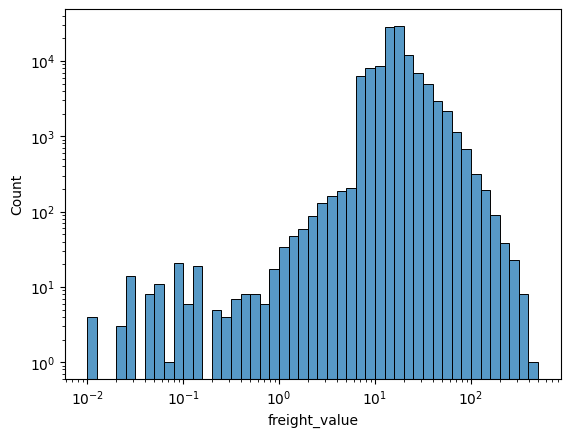

In [66]:
sns.histplot(dfi.query('freight_value > 0').freight_value, log_scale=(10, 10), binwidth=0.1)

In [67]:
dfi.describe(include='object')

,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


In [68]:
dfi.groupby('order_id', as_index=False) \
  .agg(count=('order_id', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,order_id,count
0,8272b63d03f5f79c56e9e4120aec44ef,21
1,1b15974a0141d54e36626dca3fdc731a,20
2,ab14fdcfbe524636d65ee38360e22ce8,20
3,9ef13efd6949e4573a18964dd1bbe7f5,15
4,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
98661,5a0911d70c1f85d3bed0df1bf693a6dd,1
98662,5a082b558a3798d3e36d93bfa8ca1eae,1
98663,5a07264682e0b8fbb3f166edbbffc6e8,1
98664,5a071192a28951b76774e5a760c8c9b7,1


In [69]:
dfi.groupby('product_id', as_index=False) \
  .agg(count=('product_id', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,product_id,count
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,6ca99f05e9c1952a6597264e87f01378,1
32947,6ca54e191592a843087a042b0665d7ef,1
32948,6ca5428af5edb5066b1966ad58501b60,1
32949,6ca32b4631431cb1fe976880797a0f5c,1


In [70]:
dfi.groupby('seller_id', as_index=False) \
  .agg(count=('seller_id', 'count')) \
  .sort_values('count', ascending=False) \
  .reset_index(drop=True)

,seller_id,count
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,5f57db27027655e6c6a391601daa0258,1
3091,5e25c632f9db6cfb8bc100421c2737b6,1
3092,5e106d93b717c2682b9383da480364a1,1
3093,d36b07fd3c5088e477a72d1fccfe29d4,1


# 1.&nbsp;Подсчёт количества клиентов

Определим, сколько у нас пользователей, которые совершили покупку только один раз. Для этого воспользуемся ранее созданной таблицей с покупками и объединим её с клиентами.

In [71]:
one_purhase_customers_count = dfop.merge(dfc, on='customer_id') \
  .groupby('customer_unique_id', as_index=False) \
  .agg(cnt=('customer_unique_id', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True) \
  .query('cnt == 1') \
  .cnt.sum()
percent = round(one_purhase_customers_count/dfc.customer_unique_id.nunique() * 100, 1)
print(one_purhase_customers_count, "пользователей совершило одну покупку, что составляет",
      percent, "% от общего числа уникальных пользователей.")

92085 пользователей совершило одну покупку, что составляет 95.8 % от общего числа уникальных пользователей.


# 2.&nbsp;Подсчёт не доставленных заказов

Определим, сколько заказов в месяц в среднем не доставляется по разным причинам.

Для этого, также, как и с покупками, надо определиться с понятием "недоставленный заказ". Обычная логика предполагает, что заказ размещается, затем подтверждается, оплачивается, передаётся в службу доставки и в определённый момент доставляется пользователю. Движение заказа можно отследить по временным меткам, нулевая отметка на определённом этапе может свидетельствовать о прекращении движения заказа. Посмотрим, сколько у нас нулевых (отсутствующих) таймпстемпов.

In [72]:
dfo.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Количество заказов с нулевой отметкой времени увеличивается, по мере "приближения" к клиенту, что выглядит логичным, т.к. количество возможных причин для недоставки растёт. Теоретически это должна быть кумулятивная сумма, т.е. заказ, "отсеявшийся" на этапе подтверждения или передачи в слубжбу доставки уже не должен иметь отметки о времени фактической доставки. Проверим, так ли это, а заодно посмотрим на статусы заказов.

## Неподтверждённые заказы

Заказы, у которых время подтверждения отсутствует.

In [73]:
dfo.order_approved_at.isna().sum()

160

На предыдущих этапах (создание заказа) у нас не было пропущенных значений, поэтому количество пустых дат совпадает с суммой по сгруппированной таблице.

In [74]:
dfo.query('order_approved_at != order_approved_at') \
  .groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,canceled,141
1,delivered,14
2,created,5


In [75]:
dfo.query('order_approved_at != order_approved_at') \
    .query('order_status == "created"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


5 заказов было создано, но не оплачено (пустое поле order_approved_at) и даже не подтверждено (соответственно и счёт не был выставлен).

In [76]:
dfo.query('order_approved_at != order_approved_at') \
    .query('order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [77]:
dfo.query('order_approved_at != order_approved_at') \
    .query('order_status == "canceled"') \
    .isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     141
order_delivered_customer_date    141
order_estimated_delivery_date      0
dtype: int64

141 заказ был отменён и не оплачен. Время подтверждения заказа также пустое, однако статус свидетельствует о том, что заказ был преднамеренно отменён.

In [78]:
dfo.query('order_approved_at != order_approved_at') \
    .query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


14 заказов по какой-то причине не были оплачены, однако оказались доставлены пользователю, причём также имеют отметки о прохождении службы доставки. Возможно оплата осуществлялась при получении заказа, через курьера. Хотя в этом случае можно было бы ожидать заполнения даты оплаты более поздней отметкой, чем дата получения заказа.

## Не переданные в службу доставки

Заказы, у которых отсутствует отметка времени о передаче в службу доставки. Чтобы дважды не рассматривать одни и те же заказы, исключим идентификаторы, проанализированные на предыдущем этапе.

In [79]:
dfo.dropna(subset=['order_approved_at']).shape

(99281, 8)

In [80]:
dfo.dropna(subset=['order_approved_at']) \
  .order_delivered_carrier_date.isna().sum()

1637

In [81]:
dfo.dropna(subset=['order_approved_at']) \
  .query('order_delivered_carrier_date != order_delivered_carrier_date') \
  .groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,unavailable,609
1,canceled,409
2,invoiced,314
3,processing,301
4,approved,2
5,delivered,2


In [82]:
dfo.dropna(subset=['order_approved_at']) \
  .query('order_delivered_carrier_date != order_delivered_carrier_date') \
  .query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


Здесь видим частичное повторение предыдущей ситуации: есть заказ, у которого стоит статус доставлен, при этом пустая дата передачи в службу доставки и непустая отметка о времени получения клиентом. В то же время присутствует и заказ со статусом "доставлен", но с пустыми отметками службы доставки и получения. Будем считать такое сочетание явно ошибкой, которую следует исключать из анализа.

In [83]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "approved"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


Два заказа были подтверждены и оплачены, однако до службы доставки не дошли (и даже не начали формироваться). Причина не совсем ясна, видимо какая-то внутренняя.

In [84]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "processing"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaT,NaT,2017-11-23
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaT,NaT,2018-02-02
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaT,NaT,2018-03-13
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26


In [85]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "processing"') \
    .isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

Это заказы, которые были подтверждены, оплачены и начали формироваться, но в службу доставки так и не были переданы. Скорее всего причина заключается в отсутствии какого-либо товара при сборе заказа, либо был потерян сборщиками.

In [86]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "invoiced"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [87]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "invoiced"') \
    .isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

Выставлен счёт и даже оплачен, но, по какой-то причине, до службы доставки заказ не дошёл.

In [88]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30
2197,375f80ffc05feb35ce2680f1fa490575,8f6e5911262a8742393596bee2c09eac,canceled,2017-06-13 21:10:05,2017-06-13 21:22:35,NaT,NaT,2017-07-06
...,...,...,...,...,...,...,...,...
98496,2be6c8b958e16856397259974d4abee9,ccbce7bcb13ee88adcf78890cae0ea42,canceled,2018-04-02 18:20:00,2018-04-02 18:30:38,NaT,NaT,2018-04-19
98629,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,NaT,NaT,2018-03-20
98771,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30


In [89]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "canceled"') \
    .isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     409
order_delivered_customer_date    409
order_estimated_delivery_date      0
dtype: int64

Эти заказы были подтверждены и оплачены, а затем явным образом отменены клиентом.

In [90]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "unavailable"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [91]:
dfo.dropna(subset=['order_approved_at']) \
    .query('order_delivered_carrier_date != order_delivered_carrier_date') \
    .query('order_status == "unavailable"') \
    .isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

Заказы, которые оплачены и подтверждены, но не переданы в службу доставки, т.к. оказались недоступны (отсутствовал товар на складе).

## Не доставленные клиенту

До службы доставки дошли, но клиент их не получил.

In [92]:
dfo.dropna(subset=['order_approved_at']).shape

(99281, 8)

In [93]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']).shape

(97644, 8)

In [94]:
dfo.dropna(subset=['order_approved_at']) \
  .dropna(subset=['order_delivered_carrier_date']) \
  .query('order_delivered_customer_date != order_delivered_customer_date') \
  .groupby('order_status', as_index=False) \
  .agg(cnt=('order_status', 'count')) \
  .sort_values('cnt', ascending=False) \
  .reset_index(drop=True)

,order_status,cnt
0,shipped,1107
1,canceled,69
2,delivered,7


In [95]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [96]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "delivered"') \
    .isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    7
order_estimated_delivery_date    0
dtype: int64

Присутствует неоднозначность: заказы имеют статус "доставлен", отметка службы доставки имеется, однако времени получения клиентом нет. Либо это ошибка в статусе заказа, либо при получении не было зафиксировано время. Т.к. однозначно определить статус заказа невозможно, такие записи исключим.

In [97]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
5127,8a9cce19aa49e055f2babb81d5a71c40,f2676ef361959c938b35ecd32321adce,canceled,2018-02-01 10:04:20,2018-02-03 02:52:42,2018-02-05 20:41:28,NaT,2018-02-23
5449,c1049eef89915c6beb3604bf3d6588d7,ed16865bcadcea1a00a928bf418a74bf,canceled,2018-02-05 23:08:11,2018-02-05 23:29:26,2018-02-09 22:13:01,NaT,2018-03-07
5509,885935156ba43094f3ae95f3c14e0381,3885c59916b2b261205c303fe0a10abf,canceled,2018-02-02 16:06:44,2018-02-06 04:32:39,2018-02-07 20:48:31,NaT,2018-03-08
...,...,...,...,...,...,...,...,...
93172,47e96b5cb6f0592d336b6bf8a817d1c3,9cce7727e7d1d1a738ccc755eae38e93,canceled,2018-01-21 12:44:16,2018-01-22 13:49:10,2018-02-01 00:08:56,NaT,2018-02-19
94175,c9f06c1229ec7cd4ec9aed55d434b499,fa89053140d09081b3a3a4608a74c083,canceled,2018-02-05 20:26:29,2018-02-05 20:49:48,2018-02-06 19:49:32,NaT,2018-03-01
96300,1def7af24cb7182497acfd953f6dd88b,b35c38c2cd6a72b58cb104154d9782e4,canceled,2017-12-21 09:22:36,2017-12-23 02:12:37,2018-01-30 19:28:55,NaT,2018-02-20
97207,716bcd6dfe99970baf4aed2083136ed8,42715bff8f22b8dc62e5055b1e9fef7e,canceled,2018-02-03 13:37:35,2018-02-03 13:50:26,2018-02-05 19:59:59,NaT,2018-03-01


In [98]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "canceled"') \
    .isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date      0
order_delivered_customer_date    69
order_estimated_delivery_date     0
dtype: int64

Эти заказы клиент отменил в тот момент, когда они находились в службе доставки.

In [99]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "shipped"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


In [100]:
dfo.dropna(subset=['order_approved_at']) \
    .dropna(subset=['order_delivered_carrier_date']) \
    .query('order_delivered_customer_date != order_delivered_customer_date') \
    .query('order_status == "shipped"') \
    .isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

Заказы прошли службу доставки, отгружены со склада, но покупатель их не получил. Т.е. они потеряны по дороге.

## Собираем вместе причины

Сперва удалим заказы с неоднозначным статусом.

In [101]:
dfo.query('order_delivered_customer_date != order_delivered_customer_date and \
    order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [102]:
dfo2 = dfo.query('not(order_delivered_customer_date != order_delivered_customer_date and \
    order_status == "delivered")')

In [103]:
dfo.shape

(99441, 8)

In [104]:
dfo2.shape

(99433, 8)

Список возможных причин.

|          Причина            |                Условие                   |
|-----------------------------|------------------------------------------|
| Заказ не оплачен            | status = created & approve_date = NA     |
| Отменён покупателем         | status = canceled & (delivery_date or carrier_date) = NA   |
| Не дошёл до службы доставки | status in (approved, invoiced) & carrier_date = NA |
| Потерян при сборке          | status = processing & carrier_date = NA  |
| Отсутствует на складе       | status = unavailable & carrier_date = NA |
| Потерян доставкой           | status = shipped & delivery_date = NA    |

Определим функцию, которая будет возвращать причину невозврата для ряда данных.

In [105]:
def undelivered_reason(r):
  if (pd.isnull(r.order_approved_at) and (r.order_status == 'created')):
    return 'not paid'
  elif (pd.isnull(r.order_delivered_carrier_date)):
    if (r.order_status in ('approved', 'invoiced')):
      return 'lost before carrier service'
    elif (r.order_status == 'processing'):
      return 'lost during processing'
    elif (r.order_status == 'unavailable'):
      return 'items not available'
    elif (r.order_status == 'canceled'):
      return 'canceled by customer'
  elif (pd.isnull(r.order_delivered_customer_date)):
    if (r.order_status == 'canceled'):
      return 'canceled by customer'
    elif (r.order_status == 'shipped'):
      return 'lost by carrier service'

  return 'delivered'

In [106]:
dfo3 = dfo2

In [107]:
dfo3 = dfo3.assign(reason = dfo3.apply(undelivered_reason, axis=1))

In [108]:
dfo3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,delivered


## Проверяем правильно ли определены причины

In [109]:
dfo3.reason.unique()

array(['delivered', 'lost before carrier service',
       'lost by carrier service', 'lost during processing',
       'items not available', 'canceled by customer', 'not paid'],
      dtype=object)

In [110]:
dfo3.query('reason == "delivered"').isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
reason                            0
dtype: int64

In [111]:
dfo3.query('reason == "delivered"') \
    .query('order_delivered_carrier_date != order_delivered_carrier_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,delivered


In [112]:
dfo3.query('reason == "delivered"') \
    .query('order_approved_at != order_approved_at')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,delivered
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,delivered
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,delivered
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,delivered
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,delivered
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,delivered
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,delivered
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,delivered
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,delivered
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,delivered


In [113]:
dfo3.query('reason == "lost before carrier service"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     316
order_delivered_customer_date    316
order_estimated_delivery_date      0
reason                             0
dtype: int64

In [114]:
dfo3.query('reason == "lost before carrier service"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,lost before carrier service
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,lost before carrier service
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28,lost before carrier service
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06,lost before carrier service
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20,lost before carrier service


In [115]:
dfo3.query('reason == "lost by carrier service"').isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
reason                              0
dtype: int64

In [116]:
dfo3.query('reason == "lost by carrier service"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,lost by carrier service
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,lost by carrier service
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,lost by carrier service
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,lost by carrier service
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,lost by carrier service


In [117]:
dfo3.query('reason == "lost during processing"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
reason                             0
dtype: int64

In [118]:
dfo3.query('reason == "lost during processing"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,lost during processing
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,lost during processing
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20,lost during processing
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12,lost during processing
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04,lost during processing


In [119]:
dfo3.query('reason == "items not available"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
reason                             0
dtype: int64

In [120]:
dfo3.query('reason == "items not available"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,items not available
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,items not available
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,items not available
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06,items not available
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,items not available


In [121]:
dfo3.query('reason == "canceled by customer"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
reason                             0
dtype: int64

In [122]:
dfo3.query('reason == "canceled by customer"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,canceled by customer
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,canceled by customer
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23,canceled by customer
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,canceled by customer
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,canceled by customer


In [123]:
dfo3.query('reason == "not paid"').isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
reason                           0
dtype: int64

In [124]:
dfo3.query('reason == "not paid"').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,not paid
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,not paid
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,not paid
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08,not paid
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01,not paid


## Расчёт помесячных средних

In [125]:
dfo3 = dfo3.assign(order_date = dfo3.order_purchase_timestamp.dt.strftime('%Y-%m'))

In [126]:
dfo3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,reason,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,delivered,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,delivered,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,delivered,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,delivered,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,delivered,2018-02


In [127]:
orders_delivery_status = pd.crosstab(dfo3['order_date'], dfo3['reason'])
orders_delivery_status

reason,canceled by customer,delivered,items not available,lost before carrier service,lost by carrier service,lost during processing,not paid
order_date,,,,,,,
2016-09,2,1,0,0,1,0,0
2016-10,19,270,7,18,8,2,0
2016-12,0,1,0,0,0,0,0
2017-01,3,750,10,12,16,9,0
2017-02,17,1653,45,12,21,32,0
2017-03,33,2546,32,3,45,23,0
2017-04,18,2303,9,15,49,10,0
2017-05,29,3545,31,16,55,23,0
2017-06,16,3135,24,11,47,12,0


In [128]:
orders_delivery_status.sum()

reason
canceled by customer             619
delivered                      96476
items not available              609
lost before carrier service      316
lost by carrier service         1107
lost during processing           301
not paid                           5
dtype: int64

In [129]:
orders_delivery_status.sum().sum()

99433

In [130]:
dfo3.shape

(99433, 10)

In [131]:
undelivered_orders = orders_delivery_status.drop(['delivered'], axis=1)
undelivered_orders

reason,canceled by customer,items not available,lost before carrier service,lost by carrier service,lost during processing,not paid
order_date,,,,,,
2016-09,2,0,0,1,0,0
2016-10,19,7,18,8,2,0
2016-12,0,0,0,0,0,0
2017-01,3,10,12,16,9,0
2017-02,17,45,12,21,32,0
2017-03,33,32,3,45,23,0
2017-04,18,9,15,49,10,0
2017-05,29,31,16,55,23,0
2017-06,16,24,11,47,12,0


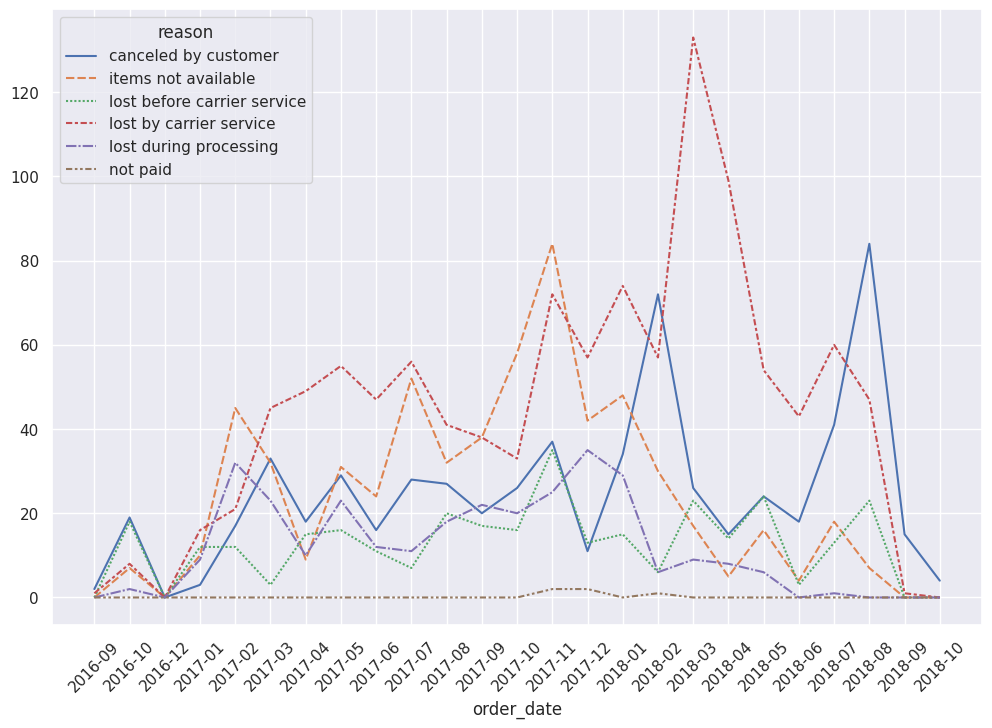

In [132]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(orders_delivery_status.drop(['delivered'], axis=1))
plt.xticks(rotation=45);

In [133]:
undelivered_orders.sum(axis=1)

order_date
2016-09      3
2016-10     54
2016-12      0
2017-01     50
2017-02    127
2017-03    136
2017-04    101
2017-05    154
2017-06    110
2017-07    154
2017-08    138
2017-09    135
2017-10    153
2017-11    255
2017-12    160
2018-01    200
2018-02    172
2018-03    208
2018-04    141
2018-05    124
2018-06     68
2018-07    133
2018-08    161
2018-09     16
2018-10      4
dtype: int64

In [134]:
print('В среднем в месяц по различным причинам не доставляется',
      int(round(undelivered_orders.sum(axis=1).mean(), 0)),
      'заказов.')


В среднем в месяц по различным причинам не доставляется 118 заказов.


In [135]:
monthly_avg_series = undelivered_orders.mean()
monthly_avg_series

reason
canceled by customer           24.76
items not available            24.36
lost before carrier service    12.64
lost by carrier service        44.28
lost during processing         12.04
not paid                        0.20
dtype: float64

In [136]:
monthly_avg_df = pd.DataFrame({'reason': monthly_avg_series.index,
              'monthly average': np.rint(monthly_avg_series.values).astype(int)
              })
monthly_avg_df

,reason,monthly average
0,canceled by customer,25
1,items not available,24
2,lost before carrier service,13
3,lost by carrier service,44
4,lost during processing,12
5,not paid,0


In [137]:
monthly_avg_df.style.hide(axis='index') \
    .set_caption('Среднее количество недоставленных заказов')

reason,monthly average
canceled by customer,25
items not available,24
lost before carrier service,13
lost by carrier service,44
lost during processing,12
not paid,0


# 3.&nbsp;Самый популярный день для товара

По каждому товару определим, в какой день недели товар чаще всего покупается. Будем использовать не весь датасет, а только ту его часть, в которую мы ранее отфильтровали подтверждённые покупки.

In [138]:
dfop.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [139]:
dfi.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Соединим две таблицы по полю "идентификатор заказа".

In [140]:
orders_and_products = dfop.merge(dfi, on='order_id')

In [141]:
orders_and_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Добавим столбец с наименованием дня недели.

In [142]:
orders_and_products = orders_and_products.assign(day = orders_and_products.order_purchase_timestamp.dt.day_name())

In [143]:
orders_and_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


Для каждой группы "товар" - "день недели" посчитаем количество заказов.

In [144]:
orders_and_products.groupby(['product_id', 'day'], as_index=False) \
    .agg(day_count=('day', 'count'))

,product_id,day,day_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
60874,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60875,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
60876,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
60877,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Чтобы определить наиболее популярные дни для каждого товара отсортируем группы "товар" - "день недели" в порядке убывания количества заказов и возьмём внутри этих групп по последнему значению (с наибольшим количеством заказов).

In [145]:
top_days_for_products = orders_and_products.groupby(['product_id', 'day'], as_index=False) \
    .agg(day_count=('day', 'count')) \
    .sort_values('day_count') \
    .groupby('product_id') \
    .tail(1) \
    .sort_values('product_id')
top_days_for_products

,product_id,day,day_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
60871,fff6177642830a9a94a0f2cba5e476d1,Sunday,1
60872,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
60873,fff9553ac224cec9d15d49f5a263411f,Friday,1
60877,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


Проверим корректность группировки.

In [146]:
orders_and_products.groupby(['product_id', 'day'], as_index=False) \
    .agg(day_count=('day', 'count')) \
    .query('product_id == "422879e10f46682990de24d770e7f83d"')

,product_id,day,day_count
15806,422879e10f46682990de24d770e7f83d,Friday,77
15807,422879e10f46682990de24d770e7f83d,Monday,64
15808,422879e10f46682990de24d770e7f83d,Saturday,57
15809,422879e10f46682990de24d770e7f83d,Sunday,47
15810,422879e10f46682990de24d770e7f83d,Thursday,79
15811,422879e10f46682990de24d770e7f83d,Tuesday,67
15812,422879e10f46682990de24d770e7f83d,Wednesday,93


In [147]:
top_days_for_products.query('product_id == "422879e10f46682990de24d770e7f83d"')

,product_id,day,day_count
15812,422879e10f46682990de24d770e7f83d,Wednesday,93


Построим график количества покупок всех товаров по дням недели.

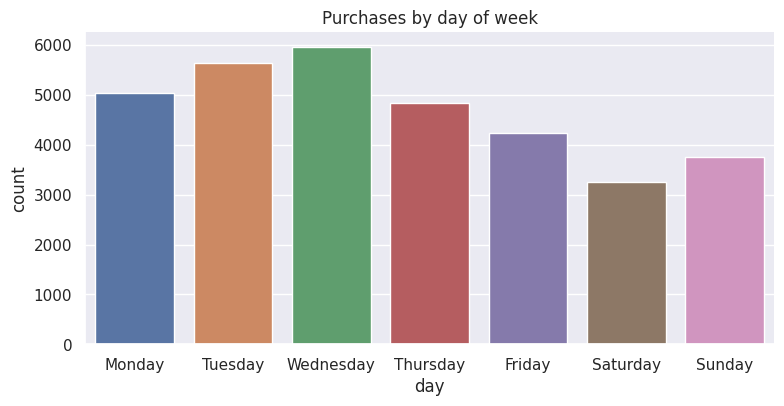

In [148]:
sns.catplot(data=top_days_for_products, x='day', kind='count',
            order=('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),
            height=4, aspect=8/4)
plt.title('Purchases by day of week');

# 4.&nbsp;Среднее количество покупок на пользователя

Рассчитаем, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам). Необходимо учесть, что внутри месяца может быть не целое количество недель.

Объединим таблицы заказов и пользователей.

In [149]:
customers_orders = dfc.merge(dfop, on='customer_id')

In [150]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Для определения количества недель в месяце разделим количество дней на 7.

In [151]:
customers_orders = customers_orders.assign(weeks=customers_orders.order_purchase_timestamp.dt.days_in_month / 7.0)

Для последующей группировки по месяцам добавим новый столбец с датой формата "год-месяц".

In [152]:
customers_orders = customers_orders.assign(order_month = customers_orders.order_purchase_timestamp.dt.strftime('%Y-%m'))

In [153]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,4.428571,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,4.428571,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,4.428571,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,4.428571,2018-07


Теперь сгруппируем заказы по идентификатору пользователя и месяцу. Посчитаем количество заказов в группе. Дополнительно добавим количество недель для данного месяца.

In [154]:
avg_week_orders = customers_orders.groupby(['customer_unique_id', 'order_month'], as_index=False) \
    .agg(orders_count=('order_id', 'count'), weeks=('weeks', 'max')) \
    .sort_values('orders_count', ascending=False)

In [155]:
avg_week_orders.head()

,customer_unique_id,order_month,orders_count,weeks
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000
75855,c8460e4251689ba205045f3ea17884a1,2018-08,4,4.428571
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714
50006,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.428571


Рассчитаем среднее количество заказов в неделю.

In [156]:
avg_week_orders = avg_week_orders.assign(avg_orders=avg_week_orders.orders_count / avg_week_orders.weeks)

In [157]:
avg_week_orders.head()

,customer_unique_id,order_month,orders_count,weeks,avg_orders
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000
75855,c8460e4251689ba205045f3ea17884a1,2018-08,4,4.428571,0.903226
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714,0.933333
50006,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.428571,0.903226


In [158]:
avg_week_orders.sort_values('avg_orders', ascending=False)

,customer_unique_id,order_month,orders_count,weeks,avg_orders
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839
68542,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4.000000,1.000000
61437,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4.000000,1.000000
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714,0.933333
...,...,...,...,...,...
82326,d9643e0f17a9f63e44217990f46a96f9,2017-01,1,4.428571,0.225806
82324,d9633788fcebca588097b7b353231eba,2018-07,1,4.428571,0.225806
82323,d962d549913ca04df1b22446da0025dd,2018-03,1,4.428571,0.225806
63889,a894220844dedf136c14a5eefbd40eb8,2017-12,1,4.428571,0.225806


avg_week_orders.describe('avg_orders')

In [159]:
avg_week_orders.describe()

,orders_count,weeks,avg_orders
count,96848.000000,96848.000000,96848.000000
mean,1.013815,4.348374,0.233361
std,0.123181,0.123803,0.029476
min,1.000000,4.000000,0.225806
25%,1.000000,4.285714,0.225806
50%,1.000000,4.428571,0.225806
75%,1.000000,4.428571,0.233333
max,6.000000,4.428571,1.354839


Видно, что среднее значение заказов в неделю невелико: медиана 0.2, максимум - 1.4. Чтобы получить более существенные цифры попробуем сгруппировать по месяцам без учёта года.

In [160]:
avg_week_orders = avg_week_orders.assign(month = avg_week_orders.order_month.str[-2:])

In [161]:
avg_week_orders.head()

,customer_unique_id,order_month,orders_count,weeks,avg_orders,month
7231,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839,01
23649,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000000,1.000000,02
75855,c8460e4251689ba205045f3ea17884a1,2018-08,4,4.428571,0.903226,08
14310,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.285714,0.933333,04
50006,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.428571,0.903226,01


In [162]:
avg_week_orders2 = avg_week_orders.groupby(['customer_unique_id', 'month'], as_index=False) \
    .agg(avg_count=('avg_orders', 'mean'))

In [163]:
avg_week_orders2.head()

,customer_unique_id,month,avg_count
0,0000366f3b9a7992bf8c76cfdf3221e2,05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,05,0.225806
2,0000f46a3911fa3c0805444483337064,03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,11,0.233333


Проверим корректность расчёта взяв покупателя с несколькими заказами.

In [164]:
avg_week_orders.query('customer_unique_id == "63cfc61cee11cbe306bff5857d00bfe4"')

,customer_unique_id,order_month,orders_count,weeks,avg_orders,month
37875,63cfc61cee11cbe306bff5857d00bfe4,2017-05,2,4.428571,0.451613,05
37879,63cfc61cee11cbe306bff5857d00bfe4,2018-05,1,4.428571,0.225806,05
37878,63cfc61cee11cbe306bff5857d00bfe4,2018-02,1,4.000000,0.250000,02
37877,63cfc61cee11cbe306bff5857d00bfe4,2017-10,1,4.428571,0.225806,10
37876,63cfc61cee11cbe306bff5857d00bfe4,2017-06,1,4.285714,0.233333,06


In [165]:
(0.451613 + 0.225806) / 2

0.3387095

In [166]:
avg_week_orders2.query('customer_unique_id == "63cfc61cee11cbe306bff5857d00bfe4"')

,customer_unique_id,month,avg_count
37856,63cfc61cee11cbe306bff5857d00bfe4,02,0.250000
37857,63cfc61cee11cbe306bff5857d00bfe4,05,0.338710
37858,63cfc61cee11cbe306bff5857d00bfe4,06,0.233333
37859,63cfc61cee11cbe306bff5857d00bfe4,10,0.225806


Видим, что среднее значение за пятый месяц рассчитано корректно. Однако средние значения заказов в неделю практически не изменились.

In [167]:
avg_week_orders.describe()

,orders_count,weeks,avg_orders
count,96848.000000,96848.000000,96848.000000
mean,1.013815,4.348374,0.233361
std,0.123181,0.123803,0.029476
min,1.000000,4.000000,0.225806
25%,1.000000,4.285714,0.225806
50%,1.000000,4.428571,0.225806
75%,1.000000,4.428571,0.233333
max,6.000000,4.428571,1.354839


In [168]:
avg_week_orders2.describe()

,avg_count
count,96805.000000
mean,0.233352
std,0.029408
min,0.225806
25%,0.225806
50%,0.225806
75%,0.233333
max,1.354839


Так произошло потому что у нас крайне мало пользователей, совершивших по несколько покупок в месяц.

In [169]:
avg_week_orders2.shape

(96805, 3)

In [170]:
avg_week_orders.shape

(96848, 6)

In [171]:
avg_week_orders.groupby(['customer_unique_id', 'month'], as_index=False) \
    .agg(cnt=('customer_unique_id', 'count')) \
    .query('cnt > 1') \
    .shape

(43, 3)

# 5.&nbsp;Когортный анализ

 Выполним когортный анализ пользователей. Сформируем помесячные когорты и определим, в какой из них самый высокий retention на 3й месяц.

## Расчёт месяца первой покупки

Месяц покупки был уже добавлен в конце п.2 как order_date:
```python
dfo3 = dfo3.assign(order_date = dfo3.order_purchase_timestamp.dt.strftime('%Y-%m'))
```

In [172]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,4.428571,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,4.428571,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,4.428571,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,4.428571,2018-07


Сгруппируем по уникальным пользователям и для каждого определим месяц первой покупки.

In [173]:
first_orders = customers_orders.groupby('customer_unique_id', as_index=False) \
    .agg(first_order_month=('order_month', 'min'))
first_orders.head()

,customer_unique_id,first_order_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


Добавим к исходной таблице с заказами данные о дате первой покупки.

In [174]:
customers_orders_coh = customers_orders.merge(first_orders, on='customer_unique_id')

In [175]:
customers_orders_coh.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month,first_order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,4.428571,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,4.428571,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,4.428571,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,4.428571,2018-07,2018-07


По заданию нас интересует период с января по декабрь - полный год. Определим диапазон дат.

In [176]:
customers_orders_coh.first_order_month.min()

'2016-09'

In [177]:
customers_orders_coh.first_order_month.max()

'2018-08'

Видим, что единственный полный год - 2017. Отфильтруем данные по месяцу первой покупки.

In [178]:
customers_orders_coh = customers_orders_coh.query('first_order_month >= "2017-01" and first_order_month <= "2017-12"')

## Формируем когорты и считаем retention rate

In [179]:
customers_orders_coh.query('order_month != first_order_month').shape

(1377, 15)

Имеем 1377 заказа с месяцем, отличным от первой покупки.

Для каждого месяца будем объединять заказы в когорту.

In [180]:
cohort_counts = customers_orders_coh.groupby('first_order_month', as_index=False) \
    .agg(cohort_orders_count=('customer_unique_id', 'nunique'))
cohort_counts

,first_order_month,cohort_orders_count
0,2017-01,750
1,2017-02,1677
2,2017-03,2571
3,2017-04,2324
4,2017-05,3541
5,2017-06,3102
6,2017-07,3822
7,2017-08,4130
8,2017-09,4075
9,2017-10,4393


In [181]:
customers_orders_coh = customers_orders_coh.merge(cohort_counts, on='first_order_month')

In [182]:
customers_orders_coh.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month,first_order_month,cohort_orders_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05,2017-05,3541
1,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,4.428571,2017-05,2017-05,3541
2,6e359a57a91f84095cc64e1b351aef8c,2e6a42a9b5cbb0da62988694f18ee295,4571,sao paulo,SP,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05-15 17:58:25,2017-05-15 18:10:18,2017-05-16 15:41:37,2017-05-19 11:10:11,2017-06-06,4.428571,2017-05,2017-05,3541
3,8392e3d4cfeec63f2a8bfea68bf1f91f,fd2d5fdb84e65fa6b54b98b0e2df5645,59655,areia branca,RN,8fd361858abba7604b18a32f16483a8d,delivered,2017-05-22 19:23:14,2017-05-22 19:30:19,2017-05-24 13:40:23,2017-06-02 13:06:02,2017-06-27,4.428571,2017-05,2017-05,3541
4,b80adce6a72fc096b80a540312a24a95,8728c766c84eeda24b3e54fe6e632051,53437,paulista,PE,176ab7788ed5343b09c9c5442f613614,delivered,2017-05-29 23:18:24,2017-05-29 23:30:17,2017-05-31 08:29:46,2017-06-19 20:09:36,2017-07-03,4.428571,2017-05,2017-05,3541


Для расчёта retention понадобится месяц покупки.

In [183]:
customers_orders_coh.groupby(['first_order_month', 'order_month'], as_index=False) \
    .agg(orders_count=('customer_unique_id', 'nunique'))

,first_order_month,order_month,orders_count
0,2017-01,2017-01,750
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
166,2017-12,2018-04,14
167,2017-12,2018-05,11
168,2017-12,2018-06,9
169,2017-12,2018-07,1


In [184]:
new_cohort_orders = customers_orders_coh.groupby(['first_order_month', 'order_month'], as_index=False) \
    .agg(new_orders_count=('customer_unique_id', 'nunique'))
new_cohort_orders

,first_order_month,order_month,new_orders_count
0,2017-01,2017-01,750
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
166,2017-12,2018-04,14
167,2017-12,2018-05,11
168,2017-12,2018-06,9
169,2017-12,2018-07,1


In [185]:
customers_orders_coh = customers_orders_coh.merge(new_cohort_orders, on=(['first_order_month', 'order_month']))

In [186]:
customers_orders_coh

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month,first_order_month,cohort_orders_count,new_orders_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05,2017-05,3541,3541
1,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,4.428571,2017-05,2017-05,3541,3541
2,6e359a57a91f84095cc64e1b351aef8c,2e6a42a9b5cbb0da62988694f18ee295,4571,sao paulo,SP,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05-15 17:58:25,2017-05-15 18:10:18,2017-05-16 15:41:37,2017-05-19 11:10:11,2017-06-06,4.428571,2017-05,2017-05,3541,3541
3,8392e3d4cfeec63f2a8bfea68bf1f91f,fd2d5fdb84e65fa6b54b98b0e2df5645,59655,areia branca,RN,8fd361858abba7604b18a32f16483a8d,delivered,2017-05-22 19:23:14,2017-05-22 19:30:19,2017-05-24 13:40:23,2017-06-02 13:06:02,2017-06-27,4.428571,2017-05,2017-05,3541,3541
4,b80adce6a72fc096b80a540312a24a95,8728c766c84eeda24b3e54fe6e632051,53437,paulista,PE,176ab7788ed5343b09c9c5442f613614,delivered,2017-05-29 23:18:24,2017-05-29 23:30:17,2017-05-31 08:29:46,2017-06-19 20:09:36,2017-07-03,4.428571,2017-05,2017-05,3541,3541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45087,ae506753fec637cb96765560fac2e7e6,4658b26bcea972ed0b86a5f8c61718be,86801,apucarana,PR,a1011d45b3b442fc2af90299beb134a2,delivered,2018-06-10 10:05:52,2018-06-10 10:19:15,2018-06-11 12:14:00,2018-06-19 15:51:53,2018-07-03,4.285714,2018-06,2017-02,1677,1
45088,eb1489020fbe59b3e535fb980f36da3f,7cf08f01ab6a6a1365e1613989a65158,96740,arroio dos ratos,RS,99044ba4cee09a5fd69a8c9a25599f55,delivered,2018-05-08 23:46:50,2018-05-09 00:14:09,2018-05-10 12:37:00,2018-05-15 21:57:00,2018-05-30,4.428571,2018-05,2017-02,1677,1
45089,e4987985a80c0f9415dec5c077e9e2eb,c0fcb07a9959ae14f01bad208e445cc4,22793,rio de janeiro,RJ,cc93c76377b9408581cc455bd50de947,delivered,2017-10-15 22:17:40,2017-10-15 22:28:31,2017-10-23 14:43:11,2017-10-30 22:39:45,2017-11-22,4.428571,2017-10,2017-02,1677,1
45090,15ef8fd01187d42b5f57af41ef5a1fe5,1f2c5059dad2c277b3b338163b49ca73,17360,torrinha,SP,26227999b191329fe62cd797aede5270,delivered,2018-02-17 01:24:58,2018-02-17 02:07:56,2018-02-21 21:34:15,2018-02-28 13:14:10,2018-03-14,4.000000,2018-02,2017-02,1677,2


In [187]:
customers_orders_coh = customers_orders_coh.assign(retention = (customers_orders_coh.new_orders_count / customers_orders_coh.cohort_orders_count) * 100)

In [188]:
customers_orders_coh

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month,first_order_month,cohort_orders_count,new_orders_count,retention
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05,2017-05,3541,3541,100.000000
1,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,4.428571,2017-05,2017-05,3541,3541,100.000000
2,6e359a57a91f84095cc64e1b351aef8c,2e6a42a9b5cbb0da62988694f18ee295,4571,sao paulo,SP,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05-15 17:58:25,2017-05-15 18:10:18,2017-05-16 15:41:37,2017-05-19 11:10:11,2017-06-06,4.428571,2017-05,2017-05,3541,3541,100.000000
3,8392e3d4cfeec63f2a8bfea68bf1f91f,fd2d5fdb84e65fa6b54b98b0e2df5645,59655,areia branca,RN,8fd361858abba7604b18a32f16483a8d,delivered,2017-05-22 19:23:14,2017-05-22 19:30:19,2017-05-24 13:40:23,2017-06-02 13:06:02,2017-06-27,4.428571,2017-05,2017-05,3541,3541,100.000000
4,b80adce6a72fc096b80a540312a24a95,8728c766c84eeda24b3e54fe6e632051,53437,paulista,PE,176ab7788ed5343b09c9c5442f613614,delivered,2017-05-29 23:18:24,2017-05-29 23:30:17,2017-05-31 08:29:46,2017-06-19 20:09:36,2017-07-03,4.428571,2017-05,2017-05,3541,3541,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45087,ae506753fec637cb96765560fac2e7e6,4658b26bcea972ed0b86a5f8c61718be,86801,apucarana,PR,a1011d45b3b442fc2af90299beb134a2,delivered,2018-06-10 10:05:52,2018-06-10 10:19:15,2018-06-11 12:14:00,2018-06-19 15:51:53,2018-07-03,4.285714,2018-06,2017-02,1677,1,0.059630
45088,eb1489020fbe59b3e535fb980f36da3f,7cf08f01ab6a6a1365e1613989a65158,96740,arroio dos ratos,RS,99044ba4cee09a5fd69a8c9a25599f55,delivered,2018-05-08 23:46:50,2018-05-09 00:14:09,2018-05-10 12:37:00,2018-05-15 21:57:00,2018-05-30,4.428571,2018-05,2017-02,1677,1,0.059630
45089,e4987985a80c0f9415dec5c077e9e2eb,c0fcb07a9959ae14f01bad208e445cc4,22793,rio de janeiro,RJ,cc93c76377b9408581cc455bd50de947,delivered,2017-10-15 22:17:40,2017-10-15 22:28:31,2017-10-23 14:43:11,2017-10-30 22:39:45,2017-11-22,4.428571,2017-10,2017-02,1677,1,0.059630
45090,15ef8fd01187d42b5f57af41ef5a1fe5,1f2c5059dad2c277b3b338163b49ca73,17360,torrinha,SP,26227999b191329fe62cd797aede5270,delivered,2018-02-17 01:24:58,2018-02-17 02:07:56,2018-02-21 21:34:15,2018-02-28 13:14:10,2018-03-14,4.000000,2018-02,2017-02,1677,2,0.119261


## Определяем когорту с самым высоким RR на 3-й месяц

Добавим столбец с номером когорты (разница между месяцем текущего заказа и месяцем первой покупки).

In [189]:
customers_orders_coh = customers_orders_coh.assign( \
    cohort = pd.to_datetime(customers_orders_coh.order_month).dt.to_period('M').view(dtype='int64') - \
               pd.to_datetime(customers_orders_coh.first_order_month).dt.to_period('M').view(dtype='int64'))

In [190]:
customers_orders_coh

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,weeks,order_month,first_order_month,cohort_orders_count,new_orders_count,retention,cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.428571,2017-05,2017-05,3541,3541,100.000000,0
1,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,4.428571,2017-05,2017-05,3541,3541,100.000000,0
2,6e359a57a91f84095cc64e1b351aef8c,2e6a42a9b5cbb0da62988694f18ee295,4571,sao paulo,SP,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05-15 17:58:25,2017-05-15 18:10:18,2017-05-16 15:41:37,2017-05-19 11:10:11,2017-06-06,4.428571,2017-05,2017-05,3541,3541,100.000000,0
3,8392e3d4cfeec63f2a8bfea68bf1f91f,fd2d5fdb84e65fa6b54b98b0e2df5645,59655,areia branca,RN,8fd361858abba7604b18a32f16483a8d,delivered,2017-05-22 19:23:14,2017-05-22 19:30:19,2017-05-24 13:40:23,2017-06-02 13:06:02,2017-06-27,4.428571,2017-05,2017-05,3541,3541,100.000000,0
4,b80adce6a72fc096b80a540312a24a95,8728c766c84eeda24b3e54fe6e632051,53437,paulista,PE,176ab7788ed5343b09c9c5442f613614,delivered,2017-05-29 23:18:24,2017-05-29 23:30:17,2017-05-31 08:29:46,2017-06-19 20:09:36,2017-07-03,4.428571,2017-05,2017-05,3541,3541,100.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45087,ae506753fec637cb96765560fac2e7e6,4658b26bcea972ed0b86a5f8c61718be,86801,apucarana,PR,a1011d45b3b442fc2af90299beb134a2,delivered,2018-06-10 10:05:52,2018-06-10 10:19:15,2018-06-11 12:14:00,2018-06-19 15:51:53,2018-07-03,4.285714,2018-06,2017-02,1677,1,0.059630,16
45088,eb1489020fbe59b3e535fb980f36da3f,7cf08f01ab6a6a1365e1613989a65158,96740,arroio dos ratos,RS,99044ba4cee09a5fd69a8c9a25599f55,delivered,2018-05-08 23:46:50,2018-05-09 00:14:09,2018-05-10 12:37:00,2018-05-15 21:57:00,2018-05-30,4.428571,2018-05,2017-02,1677,1,0.059630,15
45089,e4987985a80c0f9415dec5c077e9e2eb,c0fcb07a9959ae14f01bad208e445cc4,22793,rio de janeiro,RJ,cc93c76377b9408581cc455bd50de947,delivered,2017-10-15 22:17:40,2017-10-15 22:28:31,2017-10-23 14:43:11,2017-10-30 22:39:45,2017-11-22,4.428571,2017-10,2017-02,1677,1,0.059630,8
45090,15ef8fd01187d42b5f57af41ef5a1fe5,1f2c5059dad2c277b3b338163b49ca73,17360,torrinha,SP,26227999b191329fe62cd797aede5270,delivered,2018-02-17 01:24:58,2018-02-17 02:07:56,2018-02-21 21:34:15,2018-02-28 13:14:10,2018-03-14,4.000000,2018-02,2017-02,1677,2,0.119261,12


In [191]:
retention = customers_orders_coh.pivot_table(index='first_order_month', columns='cohort', values='retention')

In [192]:
retention.style \
    .set_caption('User retention by cohort')  \
    .background_gradient(cmap='Blues')  \
    .highlight_null('white')  \
    .format("{:.3f}%", na_rep="")

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_order_month,,,,,,,,,,,,,,,,,,,
2017-01,100.000%,0.400%,0.267%,0.133%,0.400%,0.133%,0.400%,0.133%,0.133%,,0.400%,0.133%,0.667%,0.400%,0.133%,0.133%,0.267%,0.400%,0.133%
2017-02,100.000%,0.239%,0.298%,0.119%,0.417%,0.119%,0.239%,0.179%,0.060%,0.179%,0.119%,0.298%,0.119%,0.179%,0.119%,0.060%,0.060%,0.239%,
2017-03,100.000%,0.506%,0.350%,0.389%,0.350%,0.156%,0.156%,0.311%,0.350%,0.078%,0.389%,0.117%,0.233%,0.117%,0.156%,0.233%,0.078%,0.156%,
2017-04,100.000%,0.602%,0.215%,0.172%,0.301%,0.258%,0.344%,0.301%,0.301%,0.172%,0.258%,0.086%,0.086%,0.043%,0.086%,0.086%,0.129%,,
2017-05,100.000%,0.480%,0.480%,0.395%,0.311%,0.339%,0.424%,0.141%,0.254%,0.254%,0.254%,0.339%,0.254%,0.028%,0.198%,0.226%,,,
2017-06,100.000%,0.451%,0.355%,0.387%,0.258%,0.387%,0.355%,0.226%,0.129%,0.226%,0.322%,0.322%,0.161%,0.129%,0.193%,,,,
2017-07,100.000%,0.523%,0.340%,0.235%,0.288%,0.209%,0.314%,0.105%,0.183%,0.262%,0.209%,0.288%,0.131%,0.262%,,,,,
2017-08,100.000%,0.678%,0.339%,0.266%,0.363%,0.533%,0.291%,0.266%,0.145%,0.145%,0.242%,0.194%,0.121%,,,,,,
2017-09,100.000%,0.687%,0.540%,0.294%,0.442%,0.221%,0.221%,0.245%,0.294%,0.172%,0.270%,0.074%,,,,,,,


Максимальный retention на 3-й месяц у когорты 2017-05 (июнь).

# 6.&nbsp;RFM-сегментация

Для качественного анализа аудитории построим RFM-сегментацию пользователей. В кластеризации будем использовать следующие метрики:
* R - время от последней покупки пользователя до текущей даты;
* F - суммарное количество покупок у пользователя за всё время;
* M - сумма покупок за всё время.

## Подготовка данных

Будем работать только с подтверждёнными покупками.

In [193]:
dfop.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [194]:
dfi.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Рассчитаем суммарную стоимость заказа.

In [195]:
orders_price = dfi.groupby('order_id', as_index=False) \
    .agg(order_price = ('price', 'sum'))
orders_price

,order_id,order_price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


Добавим стоимость к заказам.

In [196]:
df_rfm = dfop.merge(orders_price, on='order_id')
df_rfm

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90
...,...,...,...,...,...,...,...,...,...
98178,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00
98179,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90
98180,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99
98181,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98


Добавим идентификаторы пользователей.

In [197]:
df_rfm = df_rfm.merge(dfc, on='customer_id')
df_rfm

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_price,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98178,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
98179,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
98180,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
98181,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [198]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98183 entries, 0 to 98182
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98183 non-null  object        
 1   customer_id                    98183 non-null  object        
 2   order_status                   98183 non-null  object        
 3   order_purchase_timestamp       98183 non-null  datetime64[ns]
 4   order_approved_at              98183 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97568 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98183 non-null  datetime64[ns]
 8   order_price                    98183 non-null  float64       
 9   customer_unique_id             98183 non-null  object        
 10  customer_zip_code_prefix       98183 non-null  object        
 11  customer_city  

In [199]:
print(f'Данные по заказам представлены с {df_rfm["order_purchase_timestamp"].min()} \
по {df_rfm["order_purchase_timestamp"].max()}')

Данные по заказам представлены с 2016-09-04 21:15:19 по 2018-09-03 09:06:57


В качестве периода для RFM анализа выберем год с момента последней покупки (365 дней с 03.09.2017 по 03.09.2018 включительно).

In [200]:
NOW = df_rfm['order_purchase_timestamp'].max()
NOW

Timestamp('2018-09-03 09:06:57')

In [201]:
df_rfm["order_purchase_timestamp"].max() - df_rfm["order_purchase_timestamp"].min()


Timedelta('728 days 11:51:38')

In [202]:
period = 728

In [203]:
NOW - timedelta(days=period)

Timestamp('2016-09-05 09:06:57')

## Расчёт RFM значений для каждого клиента

Добавим столбец с количеством дней от даты заказа до текущей даты (последняя покупка).

In [204]:
df_rfm['days_since_order'] = df_rfm['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [205]:
df_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_price,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,days_since_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,335
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,40
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,288
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,201


Рассчитаем значения Recency и Frequency.

In [206]:
aggr = {
    # время от последней покупки пользователя до текущей даты (Recency)
    'days_since_order': lambda x: x.min(),
    # суммарное количество покупок у пользователя за анализируемый период (Frequency)
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]),
}
rfm = df_rfm.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'customer_unique_id':'CustomerID', 'days_since_order': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,CustomerID,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1
2,0000f46a3911fa3c0805444483337064,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,325,1
4,0004aac84e0df4da2b147fca70cf8255,292,1


Для расчёта Monetary потребуется выполнять поиск по идентификаторам пользователей. Чтобы ускорить вычисления, временно преобразуем столбец из строкового в категориальный тип данных.

In [207]:
df_rfm['customer_unique_id'] = pd.Categorical(df_rfm.customer_unique_id)

Вычислим Monetary.

In [208]:
rfm['Monetary'] = rfm['CustomerID'].apply(lambda x: df_rfm[(df_rfm['customer_unique_id'] == x) & \
                                                           (df_rfm['order_purchase_timestamp'] >= NOW - timedelta(days=period))]\
                                                           ['order_price'].sum())

In [209]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


На всякий случай (если потребуется группировать) вернём идентификаторы пользователей к строковому типу.

In [210]:
df_rfm['customer_unique_id'] = df_rfm.customer_unique_id.astype(str)

## Расчёт RFM баллов

Разобьём диапазоны на квантили.

In [211]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 97.0, 0.4: 181.0, 0.6: 272.0, 0.8: 387.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Согласно границ квантилей присвоим каждому значению RFM соответствующий балл. Исключение сделаем для Frequency, так как у нас подавляющее большинство пользователей сделало по 1 заказу и квантили были неравномерные.

In [212]:
rfm.Frequency.value_counts()

1     92081
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
0         1
Name: Frequency, dtype: int64

In [213]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5
def f_score(x, c):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x >= 4 and x <= 5:
        return 4
    else:
        return 5

In [214]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

In [215]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5


## Разбиение клиентов на сегменты

Объединим RFM-баллы в одну оценку.

In [216]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5,215


Разделим пользователей на сегменты.

| Segment	| Description |
|---------|-------------|
| Champions	| Bought recently, buy often and spend the most |
| Loyal Customers	| Buy on a regular basis. Responsive to promotions. |
| Potential Loyalist | Recent customers with average frequency. |
| Recent Customers | Bought most recently, but not often. |
| Promising	| Recent shoppers, but haven’t spent much. |
| Customers Needing Attention	| Above average recency, frequency and monetary | values. May not have bought very recently though. |
| About To Sleep | Below average recency and frequency. Will lose them if not reactivated. |
| At Risk	| Purchased often but a long time ago. Need to bring them back! |
| Can’t Lose Them	| Used to purchase frequently but haven’t returned for a long time. |
| Hibernating	| Last purchase was long back and low number of orders. May be lost. |

In [217]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,5,215,hibernating


## Визуализация сегментов

Построим распределения RFM оценок.

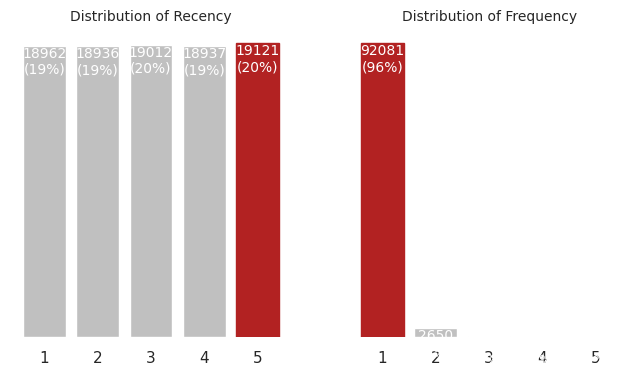

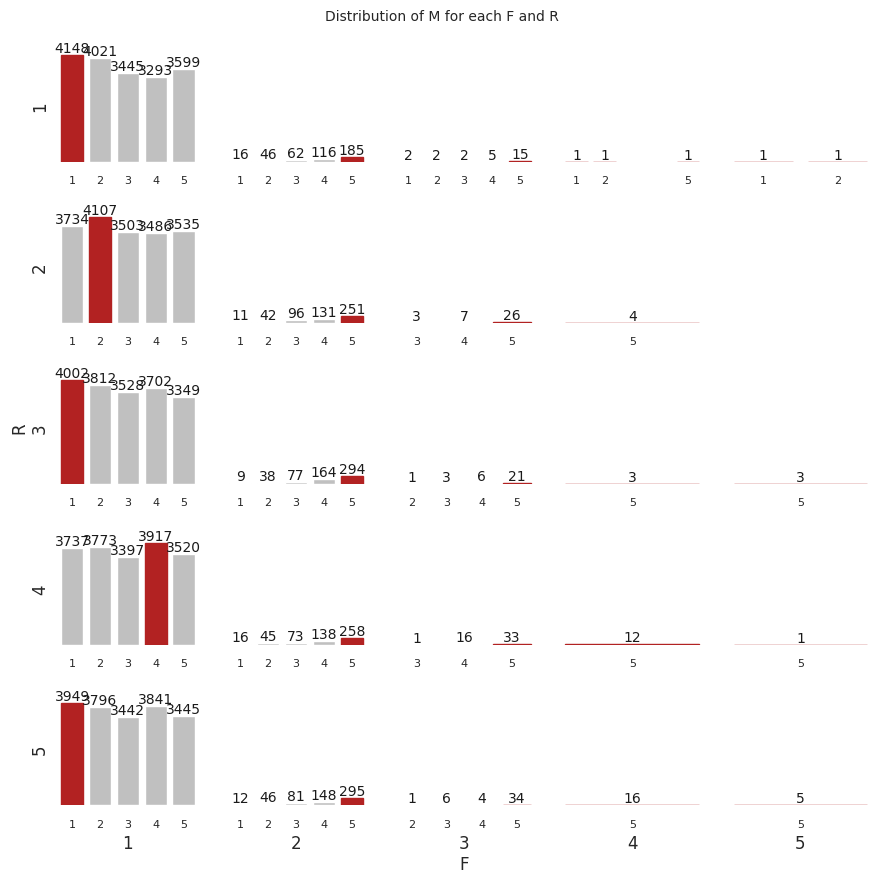

In [218]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=10)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w',
               fontsize=10
               )

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(9, 9))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k',
                    fontsize=10
                    )
fig.suptitle('Distribution of M for each F and R',
             fontsize=10)
plt.tight_layout()
plt.show()

Recency распределена равномерна, а вот Frequency нет: подавляющее большинство пользователей сделало по одному заказу.

Посчитаем количество пользователей в каждом сегменте.

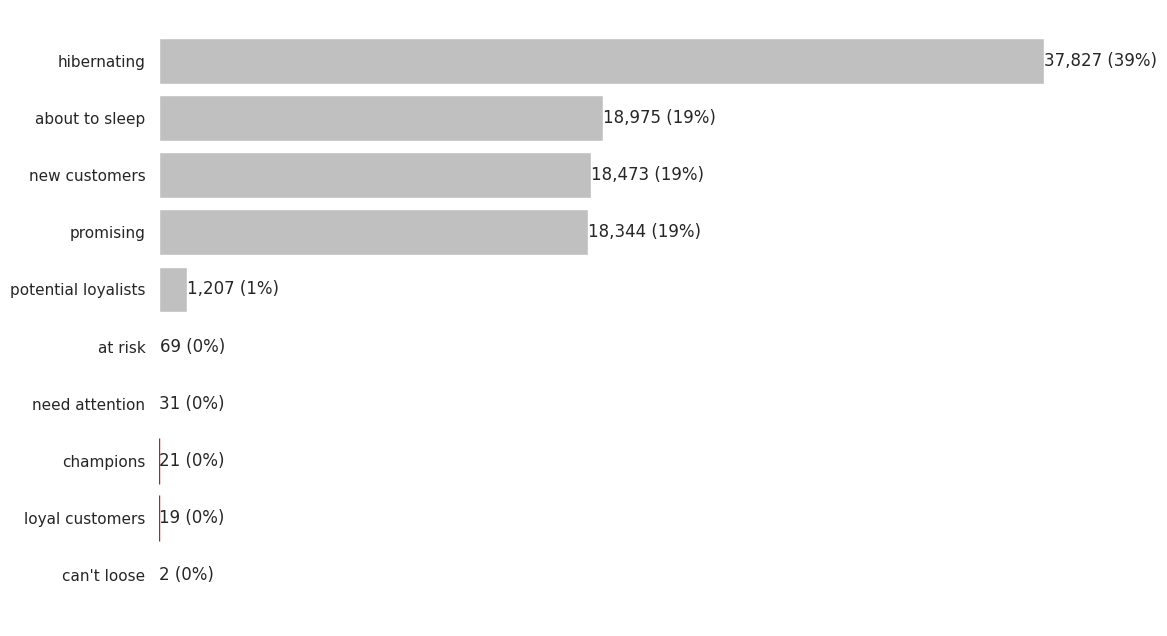

In [219]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Видим, что большая часть пользователей спит, что в принципе и так было понятно по разведочному анализу, т.к. клиенты совершают мало повторных заказов. Однако видим, что есть небольшие группы повторных заказов и потенциальных "лоялистов", на которые можно обратить внимание (и маркетинговый бюджет).

Экспорт в HTML.

In [226]:
#!pip install nbconvert
!jupyter nbconvert --to html "DA_middle_course_project.ipynb"

[NbConvertApp] Converting notebook DA_middle_course_project.ipynb to html
[NbConvertApp] Writing 2398907 bytes to DA_middle_course_project.html
